# BC yealy emissions comparison across data catalogues globally

We use different datasets to produce the global total emissions plots and the regional (Europe and West Africa) plots. In this notebook, we check that the datasets and data processing are compatible and give the same global results.

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from datetime import datetime
import cftime
from area import area

In [3]:
specie = 'BC'
specie_small = 'bc'

In [15]:
lon1_wa = -20
lon2_wa = 20
lat1_wa = -5
lat2_wa = 20

In [5]:
lon1_eu = -10
lon2_eu = 25
lat1_eu = 35
lat2_eu = 65

In [6]:
def europe_total(emissions):
    emissions_regional = select_europe(emissions) 
    return emissions_regional.sum('lat').sum('lon')

def wafrica_total(emissions):
    emissions_regional = select_wafrica(emissions) 
    return emissions_regional.sum('lat').sum('lon')

def global_total(emissions):
    return emissions.sum('lat').sum('lon')

def select_europe(data):
    return data.sel(lon=slice(lon1_eu, lon2_eu)).sel(lat=slice(lat1_eu, lat2_eu))

def select_wafrica(data):
    return data.sel(lon=slice(lon1_wa, lon2_wa)).sel(lat=slice(lat1_wa, lat2_wa))

# SSPs

In [7]:
path_ssp126 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP126_yearly.nc'
path_ssp245 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP245_yearly.nc'
path_ssp370 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP370_yearly.nc'
path_ssp460 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP460_yearly.nc'
path_ssp585 = '/work/bd1063/b309253/emissions/regional/SSPs_Glb_0.5x0.5_anthro_'+specie+'_SSP585_yearly.nc'

In [8]:
ssp126_europe = europe_total(xr.open_dataset(path_ssp126)['s3'])
ssp245_europe = europe_total(xr.open_dataset(path_ssp245)['s3'])
ssp370_europe = europe_total(xr.open_dataset(path_ssp370)['s3'])
ssp460_europe = europe_total(xr.open_dataset(path_ssp460)['s3'])
ssp585_europe = europe_total(xr.open_dataset(path_ssp585)['s3'])

In [17]:
ssp126_wafrica = wafrica_total(xr.open_dataset(path_ssp126)['s3'])
ssp245_wafrica = wafrica_total(xr.open_dataset(path_ssp245)['s3'])
ssp370_wafrica = wafrica_total(xr.open_dataset(path_ssp370)['s3'])
ssp460_wafrica = wafrica_total(xr.open_dataset(path_ssp460)['s3'])
ssp585_wafrica = wafrica_total(xr.open_dataset(path_ssp585)['s3'])

In [10]:
ssp126_global = global_total(xr.open_dataset(path_ssp126)['s3'])
ssp245_global = global_total(xr.open_dataset(path_ssp245)['s3'])
ssp370_global = global_total(xr.open_dataset(path_ssp370)['s3'])
ssp460_global = global_total(xr.open_dataset(path_ssp460)['s3'])
ssp585_global = global_total(xr.open_dataset(path_ssp585)['s3'])

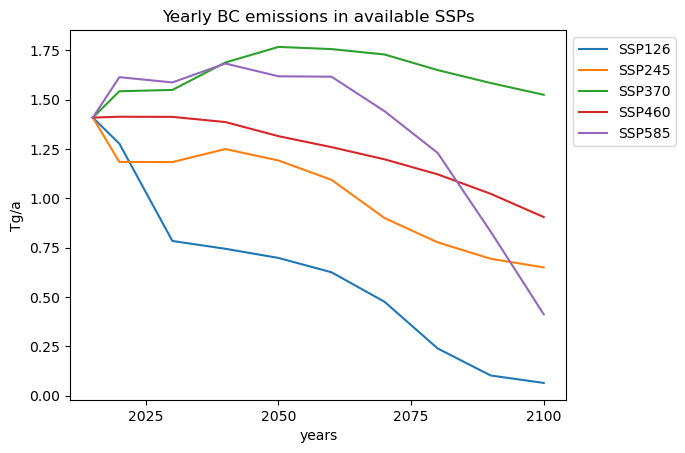

In [11]:
ssp126_global.plot(label='SSP126')
ssp245_global.plot(label='SSP245')
ssp370_global.plot(label='SSP370')
ssp460_global.plot(label='SSP460')
ssp585_global.plot(label='SSP585')

plt.title('Yearly '+specie+' emissions in available SSPs')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

Looks good! The same graph that I get with the yearly total data

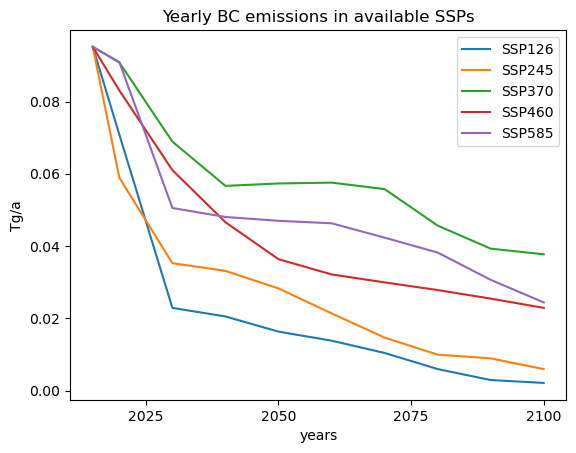

In [12]:
ssp126_europe.plot(label='SSP126')
ssp245_europe.plot(label='SSP245')
ssp370_europe.plot(label='SSP370')
ssp460_europe.plot(label='SSP460')
ssp585_europe.plot(label='SSP585')

plt.title('Yearly '+specie+' emissions in available SSPs')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

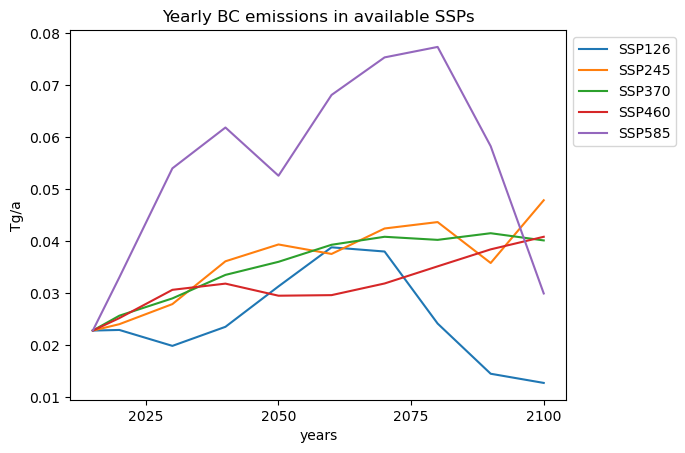

In [18]:
ssp126_wafrica.plot(label='SSP126')
ssp245_wafrica.plot(label='SSP245')
ssp370_wafrica.plot(label='SSP370')
ssp460_wafrica.plot(label='SSP460')
ssp585_wafrica.plot(label='SSP585')

plt.title('Yearly '+specie+' emissions in available SSPs')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

# CEDS: Historical emissions

In [19]:
path_ceds = '/work/bd1063/b309253/emissions/regional/CEDS_Glb_0.5x0.5_anthro_'+specie+'__yearly.nc'

In [22]:
ceds_global = global_total(xr.open_dataset(path_ceds)['transportation'])

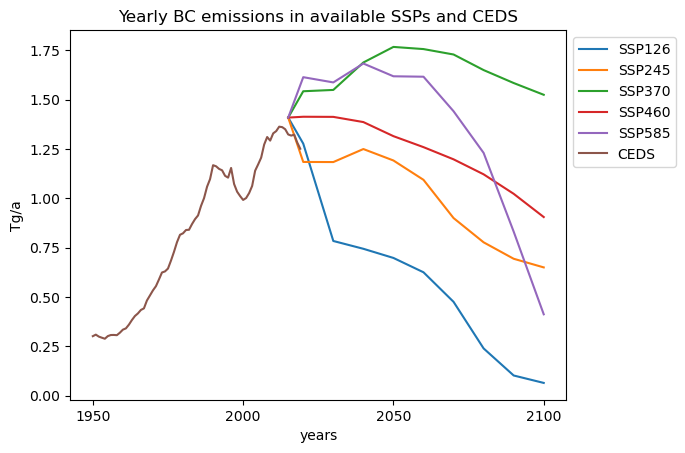

In [23]:
ssp126_global.plot(label='SSP126')
ssp245_global.plot(label='SSP245')
ssp370_global.plot(label='SSP370')
ssp460_global.plot(label='SSP460')
ssp585_global.plot(label='SSP585')
ceds_global.plot(label='CEDS')

plt.title('Yearly '+specie+' emissions in available SSPs and CEDS')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

# CAMS 

To get land transport emissions in CAMS we sum the sectors **ROAD TRANSPORTATION** and **OFF ROAD TRANSPORTATION**

In [24]:
path_cams5 = '/work/bd1063/b309253/emissions/regional/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_'+specie_small+'_v5.3_yearly.nc'
path_cams6 = '/work/bd1063/b309253/emissions/regional/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_'+specie_small+'_v6.1_yearly.nc'

In [25]:
data_cams5 = xr.open_dataset(path_cams5)
data_cams6 = xr.open_dataset(path_cams6)

In [26]:
cams5_transport = data_cams5['tnr'] + data_cams5['tro']
cams6_transport = data_cams6['tnr'] + data_cams6['tro']

In [27]:
cams5 = global_total(cams5_transport)
cams6 = global_total(cams6_transport)

In [28]:
cams5['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in cams5['time'].values]
cams6['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in cams6['time'].values]

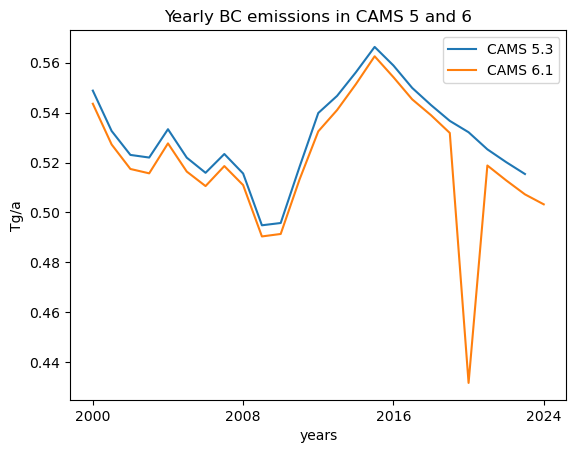

In [29]:
cams5.plot(label ='CAMS 5.3')
cams6.plot(label='CAMS 6.1')

plt.title('Yearly '+specie+' emissions in CAMS 5 and 6')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

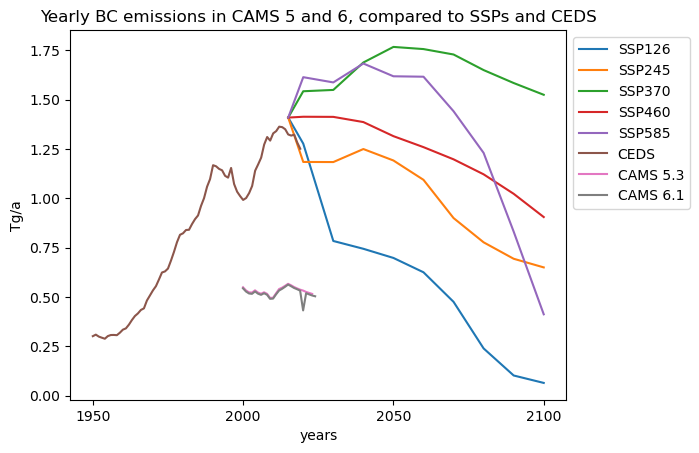

In [30]:
ssp126_global.plot(label='SSP126')
ssp245_global.plot(label='SSP245')
ssp370_global.plot(label='SSP370')
ssp460_global.plot(label='SSP460')
ssp585_global.plot(label='SSP585')
ceds_global.plot(label='CEDS')

cams5.plot(label ='CAMS 5.3')
cams6.plot(label='CAMS 6.1')

plt.title('Yearly '+specie+' emissions in CAMS 5 and 6, compared to SSPs and CEDS')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## ECLIPSE

In [31]:
eclipse5_slcp_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-GAINS-V5a_Glb_0.5x0.5_anthro_BC_SLCP_yearly.nc'
eclipse5_cle_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-GAINS-V5a_Glb_0.5x0.5_anthro_BC_CLE_yearly.nc'
eclipse5_mfr_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-GAINS-V5a_Glb_0.5x0.5_anthro_BC_MFR_yearly.nc'
eclipse5_cle_2degrees_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-GAINS-V5a_Glb_0.5x0.5_anthro_BC_CLE-2degrees_yearly.ncc'
eclipse6_path = '/work/bd1063/b309253/emissions/regional/ECLIPSE-V6_Glb_0.5x0.5_anthro_BC_CLE_yearly.nc'

In [32]:
eclipse5_slcp = global_total(xr.open_dataset(eclipse5_slcp_path)['emis_tra'])
eclipse5_cle = global_total(xr.open_dataset(eclipse5_cle_path)['emis_tra'])
eclipse5_mfr = global_total(xr.open_dataset(eclipse5_mfr_path)['emis_tra'])
eclipse5_cle_2degrees = global_total(xr.open_dataset(eclipse5_slcp_path)['emis_tra'])
eclipse6 = global_total(xr.open_dataset(eclipse6_path)['emis_tra'])

In [33]:
eclipse5_slcp['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in eclipse5_slcp['time'].values]
eclipse5_cle['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in eclipse5_cle['time'].values]
eclipse5_mfr['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in eclipse5_mfr['time'].values]
eclipse5_cle_2degrees['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in eclipse5_cle_2degrees['time'].values]
eclipse6['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in eclipse6['time'].values]

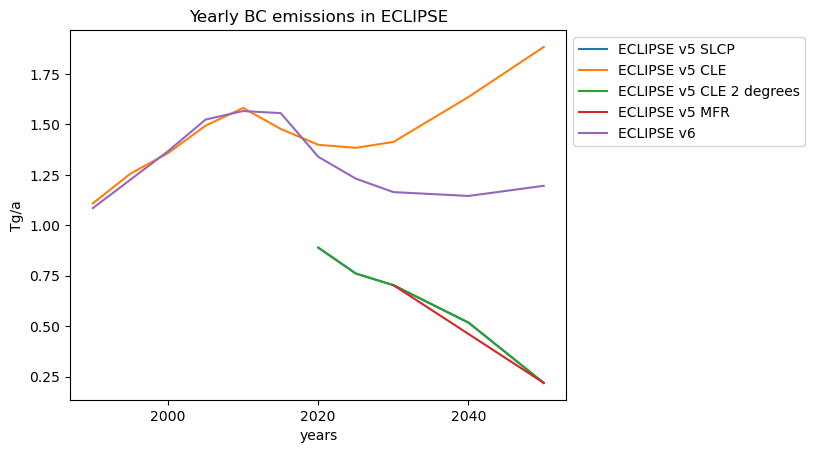

In [34]:
eclipse5_slcp.plot(label='ECLIPSE v5 SLCP')
eclipse5_cle.plot(label='ECLIPSE v5 CLE')
eclipse5_cle_2degrees.plot(label='ECLIPSE v5 CLE 2 degrees')
eclipse5_mfr.plot(label='ECLIPSE v5 MFR')
eclipse6.plot(label='ECLIPSE v6')

plt.title('Yearly '+specie+' emissions in ECLIPSE')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

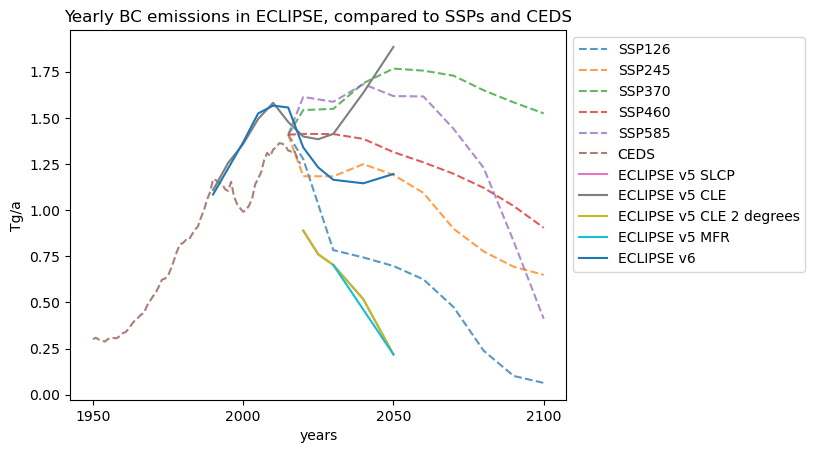

In [37]:
ssp126_global.plot(label='SSP126', linestyle='dashed', alpha = 0.75)
ssp245_global.plot(label='SSP245', linestyle='dashed', alpha = 0.75)
ssp370_global.plot(label='SSP370', linestyle='dashed', alpha = 0.75)
ssp460_global.plot(label='SSP460', linestyle='dashed', alpha = 0.75)
ssp585_global.plot(label='SSP585', linestyle='dashed', alpha = 0.75)
ceds_global.plot(label='CEDS', linestyle='dashed', alpha = 0.75)
eclipse5_slcp.plot(label='ECLIPSE v5 SLCP')
eclipse5_cle.plot(label='ECLIPSE v5 CLE')
eclipse5_cle_2degrees.plot(label='ECLIPSE v5 CLE 2 degrees')
eclipse5_mfr.plot(label='ECLIPSE v5 MFR')
eclipse6.plot(label='ECLIPSE v6')

plt.title('Yearly '+specie+' emissions in ECLIPSE, compared to SSPs and CEDS')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

## EDGAR

We consider **EDGAR V6 Land Transport** as the sum of **EDGAR V6 Non-road ground transportation**, **EDGAR V6 Road transportation no resuspension**

In [38]:
edgar6_path = '/work/bd1063/b309253/emissions/regional/EDGARv6_Glb_0.1x0.1_anthro_'+specie+'__yearly.nc'
edgar5_path = '/work/bd1063/b309253/emissions/regional/EDGARv5_Glb_0.1x0.1_anthro_'+specie+'__yearly.nc'

In [39]:
data_edgar6 = xr.open_dataset(edgar6_path)
data_edgar5 = xr.open_dataset(edgar5_path)

In [40]:
edgar6_transport = data_edgar6['tnr_other'] + data_edgar6['tro_nores']
edgar5_transport = data_edgar5['tnr_other'] + data_edgar5['tro_nores']

In [41]:
edgar6_transport.coords['lon'] = (edgar6_transport.coords['lon'] + 180) % 360 - 180
edgar5_transport.coords['lon'] = (edgar5_transport.coords['lon'] + 180) % 360 - 180
edgar6_transport = edgar6_transport.sortby(edgar6_transport.lon)
edgar5_transport = edgar5_transport.sortby(edgar5_transport.lon)

In [42]:
edgar6 = global_total(edgar6_transport)
edgar6['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in edgar6['time'].values]

In [43]:
edgar5 = global_total(edgar5_transport)
edgar5['time'] = [cftime.DatetimeNoLeap(*date.astype('datetime64[s]').astype(datetime).timetuple()[:5]) for date in edgar5['time'].values]

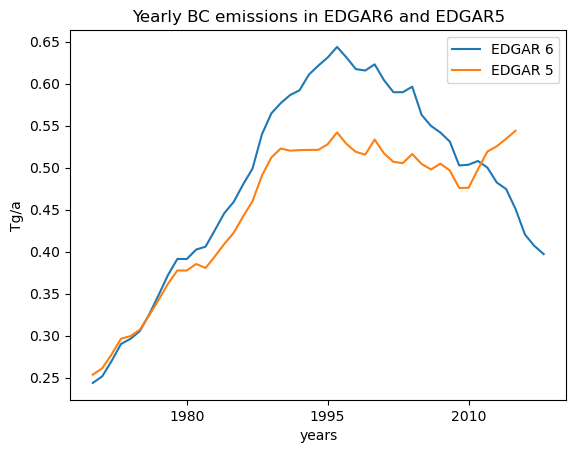

In [44]:
edgar6.plot(label='EDGAR 6')
edgar5.plot(label='EDGAR 5')

plt.title('Yearly '+specie+' emissions in EDGAR6 and EDGAR5')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

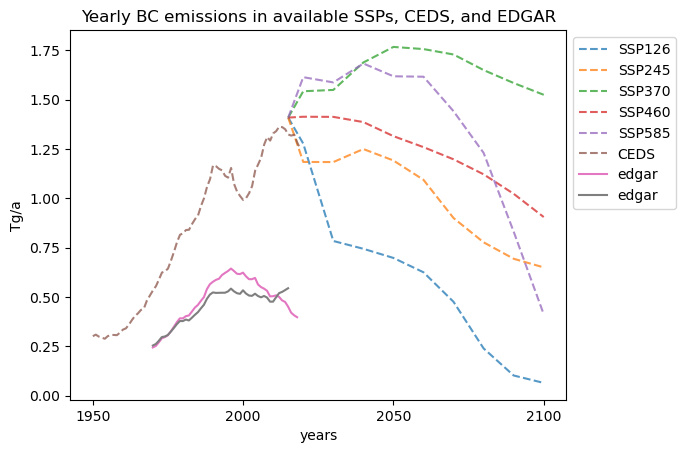

In [45]:
ssp126_global.plot(label='SSP126', linestyle='dashed', alpha = 0.75)
ssp245_global.plot(label='SSP245', linestyle='dashed', alpha = 0.75)
ssp370_global.plot(label='SSP370', linestyle='dashed', alpha = 0.75)
ssp460_global.plot(label='SSP460', linestyle='dashed', alpha = 0.75)
ssp585_global.plot(label='SSP585', linestyle='dashed', alpha = 0.75)
ceds_global.plot(label='CEDS', linestyle='dashed', alpha = 0.75)
edgar6.plot(label='edgar')
edgar5.plot(label='edgar')

plt.title('Yearly '+specie+' emissions in available SSPs, CEDS, and EDGAR')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

# All together

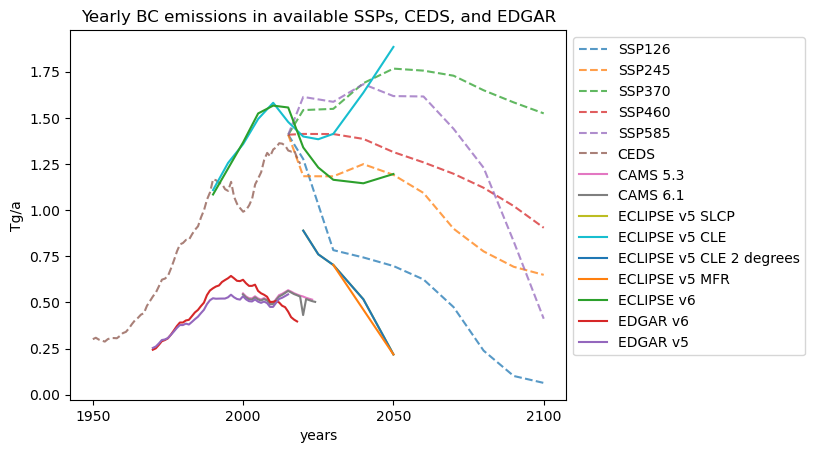

In [46]:
ssp126_global.plot(label='SSP126', linestyle='dashed', alpha = 0.75)
ssp245_global.plot(label='SSP245', linestyle='dashed', alpha = 0.75)
ssp370_global.plot(label='SSP370', linestyle='dashed', alpha = 0.75)
ssp460_global.plot(label='SSP460', linestyle='dashed', alpha = 0.75)
ssp585_global.plot(label='SSP585', linestyle='dashed', alpha = 0.75)
ceds_global.plot(label='CEDS', linestyle='dashed', alpha = 0.75)
cams5.plot(label ='CAMS 5.3')
cams6.plot(label='CAMS 6.1')
eclipse5_slcp.plot(label='ECLIPSE v5 SLCP')
eclipse5_cle.plot(label='ECLIPSE v5 CLE')
eclipse5_cle_2degrees.plot(label='ECLIPSE v5 CLE 2 degrees')
eclipse5_mfr.plot(label='ECLIPSE v5 MFR')
eclipse6.plot(label='ECLIPSE v6')
edgar6.plot(label='EDGAR v6')
edgar5.plot(label='EDGAR v5')

plt.title('Yearly '+specie+' emissions in available SSPs, CEDS, and EDGAR')
plt.ylabel('Tg/a')
plt.xlabel('years')
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Sectors definitions

**SSP & CMIP6 transport**: 

Transportation sector for CMIP6 is the sum of **Road transportation** (proxy data source from EDGAR v4.3.2 ROAD)
and **Non-road transportation** (EDGAR v4.2 NRTR)

**CEDS Transportation**

Since it's the set of emissions prepared for CMIP6, the definition of the sectors are the same

**CAMS Land Transport**

To get land transport emissions in CAMS we sum the sectors **ROAD TRANSPORTATION** and **OFF ROAD TRANSPORTATION**

**EDGAR Transportation**

To get land transport in EDGAR, we sum the sub-sectors: **Non-road ground transportation** and **Road transportation no resuspension**

**Transport** contains emissions from the combustion of fuel for all transport activity, regardless of the sector, except for international marine bunkers and international aviation bunkers, which are not included in transport emissions at a national or regional level (except for World transport emissions). This includes domestic aviation, domestic navigation, road, rail and pipeline transport, and corresponds to IPCC Source/ Sink Category 1 A 3. The IEA data are not collected in a way that allows the autoproducer consumption to be split by specific end-use and therefore, this publication shows autoproducers as a separate item.
The procedures given for calculating emissions ensure that emissions from the use of fuels for international marine and air transport are excluded from national emissions totals.


**Road** contains the emissions arising from fuel use in road vehicles, including the use of agricultural vehicles on highways. This corresponds to the IPCC Source/Sink Category 1 A 3 b

**ECLIPSE Transportation**

**CLE** (Current legislation for air pollutants)

**MFR** (Maximum technically feasible reductions)

**CLE-2°** (Climate scenario (2 degrees, CLE))

**SLCP** (Short lived climate pollutants mitigation)

Definition of **Transport** sector is consistent with CMIP6, EDGAR